In [9]:
import pandas as pd
import numpy as np
import os
import encoders
import models
from sklearn.model_selection import train_test_split
%matplotlib inline

In [10]:
# Dataset
categories = ['Democrat', 'Republican']
tweetsdf = pd.read_csv('democratvsrepublicantweets/ExtractedTweets.csv')
handlesdf = pd.read_csv('democratvsrepublicantweets/TwitterHandles.csv')
raw_tweets = tweetsdf['Tweet']
normalized_tweets = raw_tweets.str.upper()
char_to_int, int_to_char = encoders.create_encoder_decoder(normalized_tweets.str.cat())
parties = tweetsdf['Party']
y = 1.0 - np.asarray(parties == 'Democrat')
max_tweet_len = normalized_tweets.str.len().max()
X = encoders.encode_strings(normalized_tweets, char_to_int, max_tweet_len)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
filepath, model = models.model6(len(char_to_int) + 1, max_tweet_len)
if filepath in os.listdir():
    model.load_weights(filepath)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 166)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 166, 32)           16832     
_________________________________________________________________
lstm_2 (LSTM)                (None, 2)                 280       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
Total params: 17,118
Trainable params: 17,118
Non-trainable params: 0
_________________________________________________________________


In [12]:
# models.train(X_train, y_train, model, filepath)

In [13]:
predictions = np.argmax(model.predict(X_test), axis=1)

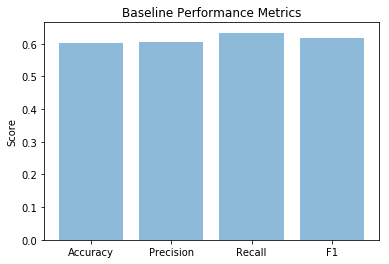

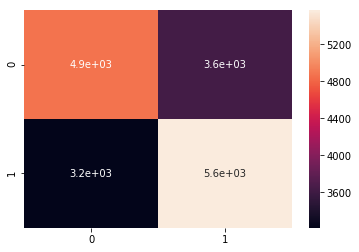

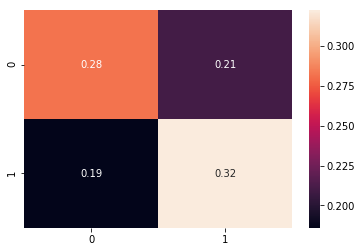

In [14]:
(accuracy, precision, recall, f1), confusion_matrix = models.plot_results(y_test, predictions)